# Topic Modeling wiht Latent Semantic Analysis

Latent Semantic Analysis (LSA) is a method for finding latent similarities between documents treated as a bag of words by using a low rank approximation. It is used for document classification, clustering and retrieval. For example, LSA can be used to search for prior art given a new patent application. In this homework, we will implement a small library for simple latent semantic analysis as a practical example of the application of SVD. The ideas are very similar to PCA. SVD is also used in recommender systems in an similar fashion (for an SVD-based recommender system library, see [Surpise](http://surpriselib.com). 

We will implement a toy example of LSA to get familiar with the ideas. If you want to use LSA or similar methods for statistical language analysis, the most efficient Python libraries are probably [gensim](https://radimrehurek.com/gensim/) and [spaCy](https://spacy.io) - these also provide an online algorithm - i.e. the training information can be continuously updated. Other useful functions for processing natural language can be found in the [Natural Language Toolkit](http://www.nltk.org/).

**Note**: The SVD from scipy.linalg performs a full decomposition, which is inefficient since we only need to decompose until we get the first k singluar values. If the SVD from `scipy.linalg` is too slow, please use the `sparsesvd` function from the [sparsesvd](https://pypi.python.org/pypi/sparsesvd/) package to perform SVD instead.  You can install in the usual way with 
```
!pip install sparsesvd
```

Then import the following
```python
from sparsesvd import sparsesvd 
from scipy.sparse import csc_matrix 
```

and use as follows
```python
sparsesvd(csc_matrix(M), k=10)
```

**Exercise 1 (20 points)**.  Calculating pairwise distance matrices.

Suppose we want to construct a distance matrix between the rows of a matrix. For example, given the matrix 

```python
M = np.array([[1,2,3],[4,5,6]])
```

the distance matrix using Euclidean distance as the measure would be
```python
[[ 0.000  1.414  2.828]
 [ 1.414  0.000  1.414]
 [ 2.828  1.414  0.000]] 
```
if $M$ was a collection of column vectors.

Write a function to calculate the pairwise-distance matrix given the matrix $M$ and some arbitrary distance function. Your functions should have the following signature:
```
def func_name(M, distance_func):
    pass
```

0. Write a distance function for the Euclidean, squared Euclidean and cosine measures.
1. Write the function using looping for M as a collection of row vectors.
2. Write the function using looping for M as a collection of column vectors.
3. Wrtie the function using broadcasting for M as a collection of row vectors.
4. Write the function using broadcasting for M as a collection of column vectors. 

For 3 and 4, try to avoid using transposition (but if you get stuck, there will be no penalty for using transposition). Check that all four functions give the same result when applied to the given matrix $M$.

In [2]:
import numpy.linalg as la
import numpy as np
import string
import pandas as pd

1. Write a distance function for the Euclidean, squared Euclidean and cosine measures.

In [3]:
def Ecildean(A,B):
    """
    function for eucildean
    """
    res=np.sum((A-B)**2,-1)**0.5
    return(res)
def Ecildean_squared(A,B):
    """
    function for squared eucildean
    """
    res=np.sum((A-B)**2,-1)
    return(res)
def cosines(A,B):
    """
    function for cosince measures
    """
    res=(A * B).sum(axis=-1)/(la.norm(B,axis=-1) * la.norm(A,axis=-1))
    return(res)

**2.Write the function using looping for M as a collection of row vectors.**

In [4]:
def looprow(M, distance_func):
    '''
    function using looping for M as a collection of row vectors
    '''
    res=np.zeros(M.shape[0]**2).reshape(M.shape[0],M.shape[0])
    for i in range(M.shape[0]):
        for j in range(M.shape[0]):
            A=M[i]
            B=M[j]
            res[i,j]=distance_func(A,B)
    return(res)

In [5]:
M = np.array([[1,2,3],[4,5,6]])

In [6]:
looprow(M,Ecildean)

array([[ 0.        ,  5.19615242],
       [ 5.19615242,  0.        ]])

In [7]:
looprow(M,Ecildean_squared)

array([[  0.,  27.],
       [ 27.,   0.]])

In [8]:
looprow(M,cosines)

array([[ 1.        ,  0.97463185],
       [ 0.97463185,  1.        ]])

**3. Write the function using looping for M as a collection of column vectors**

In [9]:
def loopcol(M, distance_func):
    '''
    function using looping for M as a collection of column vectors
    '''
    M=M.T
    res=np.zeros(M.shape[0]**2).reshape(M.shape[0],M.shape[0])
    for i in range(M.shape[0]):
        for j in range(M.shape[0]):
            A=M[i]
            B=M[j]
            res[i,j]=distance_func(A,B)
    return(res)

In [10]:
loopcol(M,Ecildean)

array([[ 0.        ,  1.41421356,  2.82842712],
       [ 1.41421356,  0.        ,  1.41421356],
       [ 2.82842712,  1.41421356,  0.        ]])

In [11]:
loopcol(M,Ecildean_squared)

array([[ 0.,  2.,  8.],
       [ 2.,  0.,  2.],
       [ 8.,  2.,  0.]])

In [12]:
loopcol(M ,cosines)

array([[ 1.        ,  0.99083017,  0.97618706],
       [ 0.99083017,  1.        ,  0.99654576],
       [ 0.97618706,  0.99654576,  1.        ]])

**4. Wrtie the function using broadcasting for M as a collection of row vectors.**

In [13]:
def vectorrow(M,distance_func):
    '''
    function using broadcasting for M as a collection of row vectors.
    '''
    A=M[np.newaxis,:,:]
    B=M[:, np.newaxis]
    res=distance_func(A,B)
    return(res)

In [14]:
vectorrow(M,Ecildean)

array([[ 0.        ,  5.19615242],
       [ 5.19615242,  0.        ]])

In [15]:
vectorrow(M,Ecildean_squared)

array([[ 0, 27],
       [27,  0]])

In [16]:
vectorrow(M,cosines)

array([[ 1.        ,  0.97463185],
       [ 0.97463185,  1.        ]])

**5. Write the function using broadcasting for M as a collection of column vectors.**

In [17]:
def vectorcol(M,distance_func):
    '''
    function using broadcasting for M as a collection of column vectors
    '''
    M=M.T
    A=M[np.newaxis,:,:]
    B=M[:, np.newaxis]
    res=distance_func(A,B)
    return(res)

In [18]:
vectorcol(M,Ecildean)

array([[ 0.        ,  1.41421356,  2.82842712],
       [ 1.41421356,  0.        ,  1.41421356],
       [ 2.82842712,  1.41421356,  0.        ]])

In [19]:
vectorcol(M,Ecildean_squared)

array([[0, 2, 8],
       [2, 0, 2],
       [8, 2, 0]])

In [20]:
vectorcol(M,cosines)

array([[ 1.        ,  0.99083017,  0.97618706],
       [ 0.99083017,  1.        ,  0.99654576],
       [ 0.97618706,  0.99654576,  1.        ]])

**Exercise 2 (20 points)**. 

**Exercise 2 (20 points)**. Write 3 functions to calculate the term frequency (tf), the inverse document frequency (idf) and the product (tf-idf). Each function should take a single argument `docs`, which is a dictionary of (key=identifier, value=document text) pairs, and return an appropriately sized array. Convert '-' to ' ' (space), remove punctuation, convert text to lowercase and split on whitespace to generate a collection of terms from the document text.

- tf = the number of occurrences of term $i$ in document $j$
- idf = $\log \frac{n}{1 + \text{df}_i}$ where $n$ is the total number of documents and $\text{df}_i$ is the number of documents in which term $i$ occurs.

Print the table of tf-idf values for the following document collection

```
s1 = "The quick brown fox"
s2 = "Brown fox jumps over the jumps jumps jumps"
s3 = "The the the lazy dog elephant."
s4 = "The the the the the dog peacock lion tiger elephant"

docs = {'s1': s1, 's2': s2, 's3': s3, 's4': s4}
```

#### method 1

### tf

tf = the number of occurrences of term $i$ in document $j$

In [22]:
def tf(docs):
    '''
    term frequency (tf) function
    '''
    table = str.maketrans('', '', string.punctuation)
    start=[s[1] for s in docs.items()]
    s=[]
    for t in start:
        s=s+t.replace('-',' ').lower().translate(table).split(' ')
    wordlist=np.unique(s).tolist()
    
    j_len=len(list(docs.keys()))
    i_len=len(wordlist)
    tf=np.zeros(j_len*i_len).reshape(i_len,j_len)
    
    for i in range(i_len):
        for j in range(j_len):
            temp=docs[list(docs.keys())[j]].replace('-',' ').lower().translate(table).split(' ')
            tf[i,j]=temp.count(wordlist[i])
    return(tf)

In [23]:
s1 = "The quick brown fox"
s2 = "Brown fox jumps over the jumps jumps jumps"
s3 = "The the the lazy dog elephant."
s4 = "The the the the the dog peacock lion tiger elephant"

docs = {'s1': s1, 's2': s2, 's3': s3, 's4': s4}

In [24]:
tf(docs)

array([[ 1.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  1.],
       [ 0.,  0.,  1.,  1.],
       [ 1.,  1.,  0.,  0.],
       [ 0.,  4.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  3.,  5.],
       [ 0.,  0.,  0.,  1.]])

we can also add the wordlist and documents number in it

In [25]:
table = str.maketrans('', '', string.punctuation)
start=[s[1] for s in docs.items()]
s=[]
for t in start:
    s=s+t.replace('-',' ').lower().translate(table).split(' ')
wordlist=np.unique(s).tolist()

In [26]:
print(wordlist)

['brown', 'dog', 'elephant', 'fox', 'jumps', 'lazy', 'lion', 'over', 'peacock', 'quick', 'the', 'tiger']


In [27]:
tf_data=pd.DataFrame(wordlist)
tf_data=pd.concat([tf_data,pd.DataFrame(tf(docs))],axis=1)
tf_data.columns=['word','s1','s2','s3','s4']
tf_data

,word,s1,s2,s3,s4
0,brown,1.0,1.0,0.0,0.0
1,dog,0.0,0.0,1.0,1.0
2,elephant,0.0,0.0,1.0,1.0
3,fox,1.0,1.0,0.0,0.0
4,jumps,0.0,4.0,0.0,0.0
5,lazy,0.0,0.0,1.0,0.0
6,lion,0.0,0.0,0.0,1.0
7,over,0.0,1.0,0.0,0.0
8,peacock,0.0,0.0,0.0,1.0
9,quick,1.0,0.0,0.0,0.0


In [142]:
tf

array([[ 1.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  1.],
       [ 0.,  0.,  1.,  1.],
       [ 1.,  1.,  0.,  0.],
       [ 0.,  4.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  3.,  5.],
       [ 0.,  0.,  0.,  1.]])

### idf

idf = $\log \frac{n}{1 + \text{df}_i}$ where $n$ is the total number of documents and $\text{df}_i$ is the number of documents in which term $i$ occurs.

In [28]:
def idf(docs):
    '''
    the inverse document frequency (idf) function
    '''
    tfs=tf(docs)
    df=(tfs!=0).sum(axis=1)
    n=len(list(docs.keys()))
    idf=np.log(n/(1+df)) 
    return(idf)

In [29]:
idf(docs)

array([ 0.28768207,  0.28768207,  0.28768207,  0.28768207,  0.69314718,
        0.69314718,  0.69314718,  0.69314718,  0.69314718,  0.69314718,
       -0.22314355,  0.69314718])

### tf_idf

In [160]:
tf

array([[ 1.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  1.],
       [ 0.,  0.,  1.,  1.],
       [ 1.,  1.,  0.,  0.],
       [ 0.,  4.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  3.,  5.],
       [ 0.,  0.,  0.,  1.]])

In [161]:
idf

array([[ 0.28768207],
       [ 0.28768207],
       [ 0.28768207],
       [ 0.28768207],
       [ 0.69314718],
       [ 0.69314718],
       [ 0.69314718],
       [ 0.69314718],
       [ 0.69314718],
       [ 0.69314718],
       [-0.22314355],
       [ 0.69314718]])

In [30]:
def tfidf(docs):
    idfs=idf(docs).reshape(-1,1)
    tfs=tf(docs)
    tfidf=idfs * tfs
    return(tfidf)

In [31]:
tfidf(docs)

array([[ 0.28768207,  0.28768207,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.28768207,  0.28768207],
       [ 0.        ,  0.        ,  0.28768207,  0.28768207],
       [ 0.28768207,  0.28768207,  0.        ,  0.        ],
       [ 0.        ,  2.77258872,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.69314718,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.69314718],
       [ 0.        ,  0.69314718,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.69314718],
       [ 0.69314718,  0.        ,  0.        ,  0.        ],
       [-0.22314355, -0.22314355, -0.66943065, -1.11571776],
       [ 0.        ,  0.        ,  0.        ,  0.69314718]])

In [33]:
tfidf_data=pd.DataFrame(tfidf(docs))
tfidf_data.columns=['s1','s2','s3','s4']
tfidf_data.index=wordlist

In [34]:
tfidf_data

,s1,s2,s3,s4
brown,0.287682,0.287682,0.000000,0.000000
dog,0.000000,0.000000,0.287682,0.287682
elephant,0.000000,0.000000,0.287682,0.287682
fox,0.287682,0.287682,0.000000,0.000000
jumps,0.000000,2.772589,0.000000,0.000000
lazy,0.000000,0.000000,0.693147,0.000000
lion,0.000000,0.000000,0.000000,0.693147
over,0.000000,0.693147,0.000000,0.000000
peacock,0.000000,0.000000,0.000000,0.693147
quick,0.693147,0.000000,0.000000,0.000000


**Exercise 3 (20 points)**. 

1. Write a function that takes a matrix $M$ and an integer $k$ as arguments, and reconstructs a reduced matrix using only the $k$ largest singular values. Use the `scipy.linagl.svd` function to perform the decomposition. This is the least squares approximation to the matrix $M$ in $k$ dimensions.

2. Apply the function you just wrote to the following term-frequency matrix for a set of $9$ documents using $k=2$ and print the reconstructed matrix $M'$.
```
M = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 2, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1]])
```

3. Calculate the pairwise correlation matrix for the original matrix M and the reconstructed matrix using $k=2$ singular values (you may use [scipy.stats.spearmanr](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) to do the calculations). Consider the fist 5 sets of documents as one group $G1$ and the last 4 as another group $G2$ (i.e. first 5 and last 4 columns). What is the average within group correlation for $G1$, $G2$ and the average cross-group correlation for G1-G2 using either $M$ or $M'$. (Do not include self-correlation in the within-group calculations.).

#### 1. write the function

In [35]:
import scipy.linalg as la
import scipy.stats as stats
from sparsesvd import sparsesvd 
from scipy.sparse import csc_matrix

####  method 1, without using sparsesvd

In [36]:
def ksvd(M,k):
    '''
    a function that takes a matrix  MM  and an integer  kk  as arguments, 
    and reconstructs a reduced matrix using only the  kk  largest singular values
    '''
    u,s,v=la.svd(M)
    s=s[0:k]
    v1=v[0:k]
    n=u.shape[1]
    s1=np.r_[np.diag(s[0:k]),np.zeros((n-k)*k).reshape((n-k),k)]
    res= u @ s1 @ v1
    return(res)

#### method 2, by using sparsesvd

In [37]:
def ksvd2(M,k):
    '''
    a function that takes a matrix  MM  and an integer  kk  as arguments, 
    and reconstructs a reduced matrix using only the  kk  largest singular values
    '''
    u,s,v=sparsesvd(csc_matrix(M), k=k)
    res= u.T @ np.diag(s) @ v
    return(res)

#### 2. apply to M

In [38]:
M = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 2, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1]])

In [39]:
res1=ksvd(M,2)
res2=ksvd2(M,2)

In [40]:
(res1-res2) < 0.0000001

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]], dtype=bool)

In [41]:
Mprime=res1
Mprime

array([[ 0.16205797,  0.40049828,  0.37895454,  0.46756626,  0.17595367,
        -0.05265495, -0.11514284, -0.15910198, -0.09183827],
       [ 0.14058529,  0.36980077,  0.32899603,  0.40042722,  0.16497247,
        -0.03281545, -0.07056857, -0.09676827, -0.04298073],
       [ 0.15244948,  0.50500444,  0.35793658,  0.41010678,  0.23623173,
         0.02421652,  0.05978051,  0.0868573 ,  0.12396632],
       [ 0.25804933,  0.84112343,  0.60571995,  0.69735717,  0.39231795,
         0.03311801,  0.08324491,  0.12177239,  0.18737973],
       [ 0.44878975,  1.23436483,  1.0508615 ,  1.26579559,  0.55633139,
        -0.07378998, -0.15469383, -0.20959816, -0.04887954],
       [ 0.15955428,  0.5816819 ,  0.37521897,  0.41689768,  0.27654052,
         0.05590374,  0.1322185 ,  0.18891146,  0.21690761],
       [ 0.15955428,  0.5816819 ,  0.37521897,  0.41689768,  0.27654052,
         0.05590374,  0.1322185 ,  0.18891146,  0.21690761],
       [ 0.21846278,  0.54958058,  0.51096047,  0.62805802,  0

Calculate the pairwise correlation matrix for the original matrix M and the reconstructed matrix using $k=2$ singular values (you may use [scipy.stats.spearmanr](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) to do the calculations). Consider the fist 5 sets of documents as one group $G1$ and the last 4 as another group $G2$ (i.e. first 5 and last 4 columns). What is the average within group correlation for $G1$, $G2$ and the average cross-group correlation for G1-G2 using either $M$ or $M'$. (Do not include self-correlation in the within-group calculations.).

In [43]:
rho, pval=stats.spearmanr(M)
rho2, pval2=stats.spearmanr(Mprime)

In [44]:
rho

array([[ 1.        , -0.19245009,  0.        ,  0.07339758, -0.33333333,
        -0.17407766, -0.25819889, -0.33333333, -0.33333333],
       [-0.19245009,  1.        ,  0.        , -0.12712835,  0.57735027,
        -0.30151134, -0.4472136 , -0.57735027, -0.19245009],
       [ 0.        ,  0.        ,  1.        ,  0.43822991,  0.        ,
        -0.21320072, -0.31622777, -0.40824829, -0.40824829],
       [ 0.07339758, -0.12712835,  0.43822991,  1.        , -0.33028913,
        -0.17248787, -0.25584086, -0.33028913, -0.33028913],
       [-0.33333333,  0.57735027,  0.        , -0.33028913,  1.        ,
        -0.17407766, -0.25819889, -0.33333333, -0.33333333],
       [-0.17407766, -0.30151134, -0.21320072, -0.17248787, -0.17407766,
         1.        ,  0.67419986,  0.52223297, -0.17407766],
       [-0.25819889, -0.4472136 , -0.31622777, -0.25584086, -0.25819889,
         0.67419986,  1.        ,  0.77459667,  0.25819889],
       [-0.33333333, -0.57735027, -0.40824829, -0.33028913, -0

In [45]:
rho2

array([[ 1.        ,  0.84413439,  1.        ,  0.99825022,  0.71929825,
        -0.83712913, -0.83712913, -0.83712913, -0.80210281],
       [ 0.84413439,  1.        ,  0.84413439,  0.83916084,  0.97022916,
        -0.55244755, -0.55244755, -0.55244755, -0.47552448],
       [ 1.        ,  0.84413439,  1.        ,  0.99825022,  0.71929825,
        -0.83712913, -0.83712913, -0.83712913, -0.80210281],
       [ 0.99825022,  0.83916084,  0.99825022,  1.        ,  0.71803963,
        -0.83916084, -0.83916084, -0.83916084, -0.8041958 ],
       [ 0.71929825,  0.97022916,  0.71929825,  0.71803963,  1.        ,
        -0.38879219, -0.38879219, -0.38879219, -0.29772375],
       [-0.83712913, -0.55244755, -0.83712913, -0.83916084, -0.38879219,
         1.        ,  1.        ,  1.        ,  0.97902098],
       [-0.83712913, -0.55244755, -0.83712913, -0.83916084, -0.38879219,
         1.        ,  1.        ,  1.        ,  0.97902098],
       [-0.83712913, -0.55244755, -0.83712913, -0.83916084, -0

With M

In [46]:
print('average within group correlation for  G1',(np.sum(rho[0:5,0:5])-5)/(5**2-5))
print('average within group correlation for  G2',(np.sum(rho[5:9,5:9])-4)/(4**2-4))
print('average cross-group correlation for G1-G2',np.mean(rho[0:5,5:9]))

average within group correlation for  G1 0.0105776866299
average within group correlation for  G2 0.43511771482
average cross-group correlation for G1-G2 -0.307562188906


With Mprime

In [47]:
print('average within group correlation for  G1',(np.sum(rho2[0:5,0:5])-5)/(5**2-5))
print('average within group correlation for  G2',(np.sum(rho2[5:9,5:9])-4)/(4**2-4))
print('average cross-group correlation for G1-G2',np.mean(rho2[0:5,5:9]))

average within group correlation for  G1 0.865079534254
average within group correlation for  G2 0.98951048951
average cross-group correlation for G1-G2 -0.677281308193


**Exercise 4 (40 points)**. Clustering with LSA

1. Begin by loading a PubMed database of selected article titles using 'cPickle'. With the following:
```import cPickle
docs = cPickle.load(open('pubmed.pic'))```

    Create a tf-idf matrix for every term that appears at least once in any of the documents. What is the shape of the tf-idf matrix? 

2. Perform SVD on the tf-idf matrix to obtain $U \Sigma V^T$ (often written as $T \Sigma D^T$ in this context with $T$ representing the terms and $D$ representing the documents). If we set all but the top $k$ singular values to 0, the reconstructed matrix is essentially $U_k \Sigma_k V_k^T$, where $U_k$ is $m \times k$, $\Sigma_k$ is $k \times k$ and $V_k^T$ is $k \times n$. Terms in this reduced space are represented by $U_k \Sigma_k$ and documents by $\Sigma_k V^T_k$. Reconstruct the matrix using the first $k=10$ singular values.

3. Use agglomerative hierarchical clustering with complete linkage to plot a dendrogram and comment on the likely number of  document clusters with $k = 100$. Use the dendrogram function from [SciPy ](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

4. Determine how similar each of the original documents is to the new document `mystery.txt`. Since $A = U \Sigma V^T$, we also have $V = A^T U S^{-1}$ using orthogonality and the rule for transposing matrix products. This suggests that in order to map the new document to the same concept space, first find the tf-idf vector $v$ for the new document - this must contain all (and only) the terms present in the existing tf-idx matrix. Then the query vector $q$ is given by $v^T U_k \Sigma_k^{-1}$. Find the 10 documents most similar to the new document and the 10 most dissimilar. 

Begin by loading a PubMed database of selected article titles using 'cPickle'. With the following: import cPickle
docs = cPickle.load(open('pubmed.pic'))
Create a tf-idf matrix for every term that appears at least once in any of the documents. What is the shape of the tf-idf matrix?

In [48]:
import pickle
docs=pickle.load(open('data/pubmed.pic', 'rb'))

In [49]:
names=list(docs.keys())

In [50]:
names=list(docs.keys())
doc_terms = []
for i,j in enumerate(names):
    text=docs[names[i]]
    text = text.replace('-',' ')
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    doc_terms.append(words)

In [51]:
doc_terms

[['phenotypic',
  'profiling',
  'of',
  'cd8',
  't',
  'cells',
  'during',
  'plasmodium',
  'vivax',
  'blood',
  'stage',
  'infection',
  'backgroundfor',
  'a',
  'long',
  'time',
  'the',
  'role',
  'of',
  'cd8',
  't',
  'cells',
  'in',
  'blood',
  'stage',
  'malaria',
  'was',
  'not',
  'considered',
  'important',
  'because',
  'erythrocytes',
  'do',
  'not',
  'express',
  'major',
  'histocompatibility',
  'complex',
  'mhc',
  'class',
  'i',
  'proteins',
  'while',
  'recent',
  'evidences',
  'suggest',
  'that',
  'cd8',
  't',
  'cells',
  'may',
  'play',
  'an',
  'important',
  'role',
  'during',
  'the',
  'erythrocytic',
  'phase',
  'of',
  'infection',
  'by',
  'eliminating',
  'parasites',
  'cd8',
  't',
  'cells',
  'might',
  'also',
  'contribute',
  'to',
  'modulate',
  'the',
  'host',
  'response',
  'through',
  'production',
  'of',
  'regulatory',
  'cytokines',
  'thus',
  'the',
  'role',
  'of',
  'cd8',
  't',
  'cells',
  'during',


In [52]:
doc_terms = []
for i,j in enumerate(names):
    text=docs[names[i]]
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    doc_terms.append(words)

In [54]:
import toolz as tz

In [55]:
tfs = {name: tz.frequencies(doc) 
      for name, doc in zip(names, doc_terms)}
dfs = tz.frequencies(tz.concat(d.keys() for d in tfs.values()))
idfs = {term: np.log((len(names))/(1 + count)) for term, count in dfs.items()}
terms = list(tz.unique(tz.concat(doc_terms)))
tf_idf = {}
for name, doc in tfs.items():
    d = {}
    for term in terms:
        d[term] = doc.get(term, 0) * idfs[term]
    tf_idf[name] = d
tf_idf = pd.DataFrame(tf_idf)

the shape of tf-idf matrix is (6906, 178)

In [56]:
tf_idf.shape

(6906, 178)

Perform SVD on the tf-idf matrix to obtain $U \Sigma V^T$ (often written as $T \Sigma D^T$ in this context with $T$ representing the terms and $D$ representing the documents). If we set all but the top $k$ singular values to 0, the reconstructed matrix is essentially $U_k \Sigma_k V_k^T$, where $U_k$ is $m \times k$, $\Sigma_k$ is $k \times k$ and $V_k^T$ is $k \times n$. Terms in this reduced space are represented by $U_k \Sigma_k$ and documents by $\Sigma_k V^T_k$. Reconstruct the matrix using the first $k=10$ singular values.


In [57]:
tf_idf0=np.matrix(tf_idf)

In [58]:
rec=ksvd2(tf_idf0,10)

In [59]:
rec

array([[ 0.01123031, -0.08485861,  0.05204088, ...,  0.01936177,
         0.1820454 , -0.02620365],
       [ 0.00566557,  0.04555995,  0.01520013, ...,  0.03732856,
         0.05225018,  0.06148543],
       [-0.00219459, -0.08859928,  0.06857936, ..., -0.06667848,
        -0.10601548, -0.06143467],
       ..., 
       [ 0.00659898,  0.00271504,  0.01527595, ...,  0.00093522,
         0.03801025,  0.00330141],
       [ 0.01444227,  0.25876364,  0.04940996, ...,  0.21248925,
         0.05404075,  0.34365746],
       [ 0.00708504,  0.01883644,  0.01659023, ...,  0.01436447,
         0.06806784,  0.02658226]])

In [60]:
rec.shape

(6906, 178)

Use agglomerative hierarchical clustering with complete linkage to plot a dendrogram and comment on the likely number of  document clusters with $k = 100$. Use the dendrogram function from [SciPy ](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).


In [63]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [61]:
u,s,v=sparsesvd(csc_matrix(tf_idf), k=100)
docscluster=u.T @ np.diag(s) @ v

In [64]:
Z = linkage(docscluster.T, 'complete')

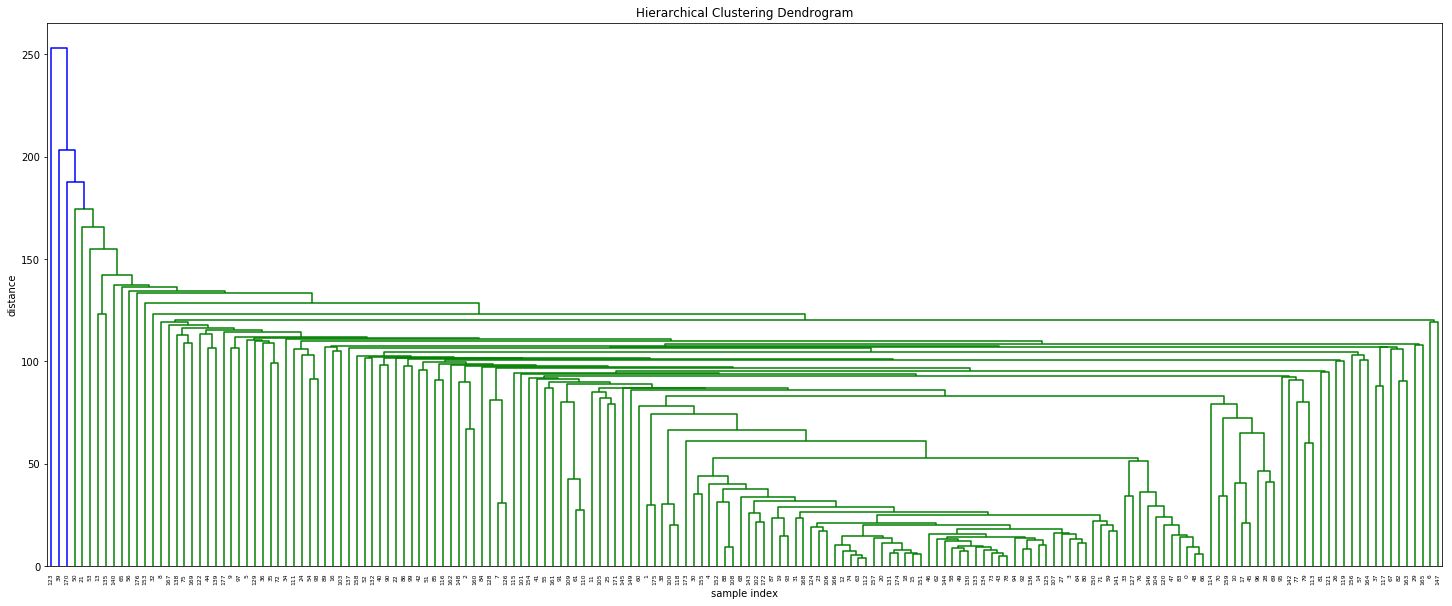

In [65]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=6.,  # font size for the x axis labels
)
plt.show()

Determine how similar each of the original documents is to the new document `mystery.txt`. Since $A = U \Sigma V^T$, we also have $V = A^T U S^{-1}$ using orthogonality and the rule for transposing matrix products. This suggests that in order to map the new document to the same concept space, first find the tf-idf vector $v$ for the new document - this must contain all (and only) the terms present in the existing tf-idx matrix. Then the query vector $q$ is given by $v^T U_k \Sigma_k^{-1}$. Find the 10 documents most similar to the new document and the 10 most dissimilar. 

In [66]:
with open('data/mystery.txt') as f:
    newdoc=f.read()
    
docs['new']=newdoc
len(docs)

179

In [67]:
### tfidf
names=list(docs.keys())
doc_terms = []
for i,j in enumerate(names):
    text=docs[names[i]]
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    doc_terms.append(words)
    
tfs = {name: tz.frequencies(doc) 
      for name, doc in zip(names, doc_terms)}
dfs = tz.frequencies(tz.concat(d.keys() for d in tfs.values()))
idfs = {term: np.log((len(names))/(1 + count)) for term, count in dfs.items()}
terms = list(tz.unique(tz.concat(doc_terms)))

tf_idf2 = {}
for name, doc in tfs.items():
    d = {}
    for term in terms:
        d[term] = doc.get(term, 0) * idfs[term]
    tf_idf2[name] = d
    
tf_idf2 = pd.DataFrame(tf_idf2)

In [68]:
## keep the works in old docs
temp=tf_idf
temp2=tf_idf2
temp['ind']=tf_idf.index
temp2['ind']=tf_idf2.index
tf3=temp2.loc[temp2.ind.isin(temp.ind)].reset_index(drop=True).drop(['ind'],axis=1)
tf3.shape

(6906, 179)

In [69]:
tf3=np.matrix(tf3)
vv = tf3[:,-1].reshape((-1,1))
print(vv.shape)

(6906, 1)


In [70]:
q = vv.T@u.T@np.diag(1/s)
V=tf_idf0.T@u.T@np.diag(1/s)
print(V.shape)

(178, 100)


In [80]:
list(tf_idf.T.index)

['"Living Well with Diabetes": Evaluation of a Pilot Program to Promote Diabetes Prevention and Self-Management in a Medically Underserved Community.',
 '(-)-Epigallocatechingallate induces apoptosis in B lymphoma cells via caspase-dependent pathway and Bcl-2 family protein modulation.',
 '5-HTTLPR genotype, asthma, diabetes and late-life depression in an older French population.',
 'A CD45-based barcoding approach to multiplex mass-cytometry (CyTOF).',
 'A Multicenter Outcomes Analysis of Children With Severe Rhino/Enteroviral Respiratory Infection*',
 'A biomimetic microfluidic chip to study the circulation and mechanical retention of red blood cells in the spleen.',
 'A cohort study of the effectiveness of insecticide-treated bed nets to prevent malaria in an area of moderate pyrethroid resistance, Malawi.',
 'A small subset of artemisinin induced dormant P. falciparum parasites maintain mitochondrial membrane potential and resume growth in vitro.',
 'Acute response of peripheral CC

In [79]:
ranks

,num,sames
0,Phenotypic profiling of CD8 + T cells during P...,0.400099
1,Addition of histamine to subcutaneously inject...,0.044252
2,Genome-wide association study of clinically de...,-0.016544
3,The Avian Transcriptome Response to Malaria In...,0.018629
4,Efficacy and Safety of Saxagliptin as Add-On T...,0.378418
5,The influence of organophosphate and carbamate...,0.028466
6,CD40 Is Required for Protective Immunity again...,0.029164
7,Airport malaria: report of four cases in Tunisia.,0.002447
8,Antiprotozoal Activity and DNA Binding of Dica...,0.134848
9,Distinct Helix Propensities and Membrane Inter...,-0.013498


In [71]:
res=np.r_[q,V]
res=np.array(res).reshape(res.shape[0],res.shape[1])
measure = looprow(res,cosines)[0,1:]
measure.shape

(178,)

In [81]:
ranks=pd.DataFrame(list(tf_idf.T.index)[0:178])
ranks['sames']=measure
ranks.columns=['num','sames']
ranks2=ranks.sort_values('sames').reset_index(drop=True)

,num,sames
0,NFATc1 deletion in T lymphocytes inhibits the ...,-0.119825
1,Pre- and Postnatal Risk Factors in Relation to...,-0.107947
2,CD40 Is Required for Protective Immunity again...,-0.103419
3,IRGM3 contributes to immunopathology and is re...,-0.100533
4,Time-to-infection by Plasmodium falciparum is ...,-0.086458


In [86]:
ranks2.head(10)

,num,sames
0,NFATc1 deletion in T lymphocytes inhibits the ...,-0.119825
1,Pre- and Postnatal Risk Factors in Relation to...,-0.107947
2,CD40 Is Required for Protective Immunity again...,-0.103419
3,IRGM3 contributes to immunopathology and is re...,-0.100533
4,Time-to-infection by Plasmodium falciparum is ...,-0.086458
5,Nerve Growth Factor Potentiates Nicotinic Syna...,-0.086324
6,Adjuvant poly(N-isopropylacrylamide) generates...,-0.059380
7,CD4 T-cell subsets in malaria: TH1/TH2 revisited.,-0.055877
8,Antibodies to the Plasmodium falciparum protei...,-0.048935
9,Boronate Probes for the Detection of Hydrogen ...,-0.042775


In [85]:
list(ranks2.head(10).num)

['NFATc1 deletion in T lymphocytes inhibits the allergic trait in a murine model of asthma.',
 'Pre- and Postnatal Risk Factors in Relation to Allergic Rhinitis in School-Aged Children in China.',
 'CD40 Is Required for Protective Immunity against Liver Stage Plasmodium Infection.',
 'IRGM3 contributes to immunopathology and is required for differentiation of antigen-specific effector CD8+ T cells in experimental cerebral malaria.',
 'Time-to-infection by Plasmodium falciparum is largely determined by random factors.',
 'Nerve Growth Factor Potentiates Nicotinic Synaptic Transmission in Mouse Airway Parasympathetic Neurons.',
 'Adjuvant poly(N-isopropylacrylamide) generates more efficient monoclonal antibodies against truncated recombinant histidine-rich protein 2 of Plasmodium falciparum for malaria diagnosis.',
 'CD4 T-cell subsets in malaria: TH1/TH2 revisited.',
 'Antibodies to the Plasmodium falciparum proteins MSPDBL1 and MSPDBL2 opsonise merozoites, inhibit parasite growth and p

In [88]:
ranks2.tail(10)

,num,sames
168,A Multicenter Outcomes Analysis of Children Wi...,0.378418
169,Demographic Disparities Among Medicare Benefic...,0.386315
170,"""Living Well with Diabetes"": Evaluation of a P...",0.400099
171,Inducible laryngeal obstruction during exercis...,0.418660
172,Outcomes of a Diabetes Education Program for R...,0.430947
173,Efficacy of a Transition Theory-Based Discharg...,0.462671
174,Health Care Utilization Among U.S. Adults With...,0.489490
175,Feasibility of the SMART Project: A Text Messa...,0.500494
176,Disparities in Postpartum Follow-Up in Women W...,0.503376
177,Diabetes Numeracy and Blood Glucose Control: A...,0.641069


In [89]:
list(ranks2.tail(10).num)

['A Multicenter Outcomes Analysis of Children With Severe Rhino/Enteroviral Respiratory Infection*',
 'Demographic Disparities Among Medicare Beneficiaries with Type 2 Diabetes Mellitus in 2011: Diabetes Prevalence, Comorbidities, and Hypoglycemia Events.',
 '"Living Well with Diabetes": Evaluation of a Pilot Program to Promote Diabetes Prevention and Self-Management in a Medically Underserved Community.',
 'Inducible laryngeal obstruction during exercise: moving beyond vocal cords with new insights.',
 'Outcomes of a Diabetes Education Program for Registered Nurses Caring for Individuals With Diabetes.',
 'Efficacy of a Transition Theory-Based Discharge Planning Program for Childhood Asthma Management.',
 'Health Care Utilization Among U.S. Adults With Diagnosed Diabetes, 2013.',
 'Feasibility of the SMART Project: A Text Message Program for Adolescents With Type 1 Diabetes.',
 'Disparities in Postpartum Follow-Up in Women With Gestational Diabetes Mellitus.',
 'Diabetes Numeracy and 

Notes on the Pubmed articles
----

These were downloaded with the following script.

```python
from Bio import Entrez, Medline
Entrez.email = "YOUR EMAIL HERE"
import cPickle

try:
    docs = cPickle.load(open('pubmed.pic'))
except Exception, e:
    print e

    docs = {}
    for term in ['plasmodium', 'diabetes', 'asthma', 'cytometry']:
        handle = Entrez.esearch(db="pubmed", term=term, retmax=50)
        result = Entrez.read(handle)
        handle.close()
        idlist = result["IdList"]
        handle2 = Entrez.efetch(db="pubmed", id=idlist, rettype="medline", retmode="text")
        result2 = Medline.parse(handle2)
        for record in result2:
            title = record.get("TI", None)
            abstract = record.get("AB", None)
            if title is None or abstract is None:
                continue
            docs[title] = '\n'.join([title, abstract])
            print title
        handle2.close()
    cPickle.dump(docs, open('pubmed.pic', 'w'))
docs.values()
```